In [1]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np

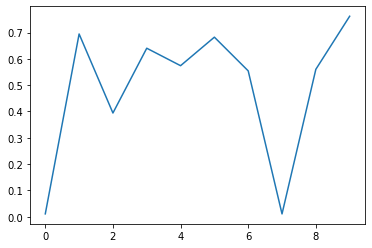

In [10]:
x = np.arange(10)
y = np.random.rand(10)
plt.plot(x, y)